In [1]:
cd ../..

C:\Users\thinh\Documents\TN-Vathes\WangLab\orofacial_pipeline


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pipeline import lab, experiment, ephys, tracking

Connecting thinh@datajoint-db.orofacial-sensorimotor-circuits.org:3306


# Overview plot

### An overall summary plot of behavior, tracking, and spiking activity for a particular session

In [5]:
session_key = {'subject_id': 'vIRt49', 'session': 1}

In [6]:
experiment.Session & session_key

subject_id,session session number,session_date,"session_time computer time for t=0. This is the start of the data acquisition from the master device (typically with the highest sampling rate, e.g., ephys acquisition device)",session_basename unique id used for referencing session files. All files associated to that session should contain that base name (or be within a folder that does),username,rig
vIRt49,1,2020-09-14,17:11:02,vIRt49_0914_5400,vincent,vincent_ephys_335


In [7]:
experiment.BehaviorTrial & session_key

subject_id,session session number,trial trial number (1-based indexing),task task type,task_protocol task protocol
vIRt49,1,0,hf wheel,0
vIRt49,1,1,hf wheel,0
vIRt49,1,2,hf wheel,0


## Extract whisker tracking data

In [8]:
tracking.Tracking.WhiskerTracking & session_key

subject_id,session session number,tracking_device device type/function,"whisker_idx 0, 1, 2",angle mean angle at follicle,curvature mean curvature (1/mm),"face_x approximate center of whisker pad, x (px)","face_y approximate center of whisker pad, y (px)",follicle_x follicle position: x (px),follicle_y follicle position: y (px),tip_x tip position: x (px),tip_y tip position: y (px)
vIRt49,1,WT_Camera_Vincent 0,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
vIRt49,1,WT_Camera_Vincent 0,1,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
vIRt49,1,WT_Camera_Vincent 0,2,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
vIRt49,1,WT_Camera_Vincent 0,3,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
vIRt49,1,WT_Camera_Vincent 0,4,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
vIRt49,1,WT_Camera_Vincent 0,5,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
vIRt49,1,WT_Camera_Vincent 0,6,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [9]:
device_key = {'tracking_device': 'WT_Camera_Vincent 0'}

In [10]:
tracking_timestamps = (tracking.Tracking & session_key & device_key).fetch1('tracking_timestamps')

In [11]:
tracking_timestamps

array([0.00000e+00, 2.00000e-03, 4.00000e-03, ..., 4.62918e+02,
       4.62920e+02, 4.62922e+02])

In [12]:
whiskers, whisker_angles = (tracking.Tracking.WhiskerTracking & session_key & device_key).fetch(
    'whisker_idx', 'angle', order_by='whisker_idx')

In [13]:
whiskers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [14]:
whisker_angles

array([array([-88.60905457, -86.95017242, -84.90232849, ...,          nan,
                nan,          nan]),
       array([-73.38474274, -71.41560364, -68.97722626, ...,          nan,
                nan,          nan]),
       array([-65.12258911, -63.58729172, -62.80516434, ...,          nan,
                nan,          nan]),
       array([-40.54084778, -91.73492432, -72.95057678, ...,          nan,
                nan,          nan]),
       array([-91.73139191, -91.95386505, -81.62176514, ...,          nan,
                nan,          nan]),
       array([-90.37512207, -86.86328888, -89.1737442 , ...,          nan,
                nan,          nan]),
       array([-90.08402252, -92.87467194, -93.13995361, ...,          nan,
                nan,          nan]),
       array([-89.67307281, -87.51727295, -86.61110687, ...,          nan,
                nan,          nan]),
       array([-93.00866699, -90.17359161, -89.98309326, ...,          nan,
                nan,         

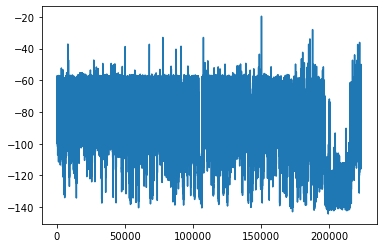

In [16]:
plt.plot(whisker_angles[1])

## Extract units' spiketimes

In [17]:
ephys.Unit & session_key

subject_id,session session number,insertion_number,clustering_method,unit,unit_quality,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name,electrode_group electrode group,"electrode electrode index, starts at 1","unit_posx (um) estimated x position of the unit relative to probe's tip (0,0)","unit_posy (um) estimated y position of the unit relative to probe's tip (0,0)",spike_times (s) from the start of the first data point used in clustering,spike_sites array of electrode associated with each spike,spike_depths (um) array of depths associated with each spike,unit_amp,unit_snr
vIRt49,1,0,jrclust_v4,1,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,1,1.3361542224884033,2.7669739723205566,=BLOB=,=BLOB=,=BLOB=,282.38644,nan
vIRt49,1,0,jrclust_v4,2,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,2,17.200834274291992,14.647157669067383,=BLOB=,=BLOB=,=BLOB=,211.8829,nan
vIRt49,1,0,jrclust_v4,3,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,2,17.93284797668457,16.78452491760254,=BLOB=,=BLOB=,=BLOB=,136.88995,nan
vIRt49,1,0,jrclust_v4,4,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,2,13.520949363708496,17.735334396362305,=BLOB=,=BLOB=,=BLOB=,159.24747,nan
vIRt49,1,0,jrclust_v4,5,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,4,21.204940795898438,31.722515106201172,=BLOB=,=BLOB=,=BLOB=,135.57997,nan
vIRt49,1,0,jrclust_v4,6,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,5,1.3157755136489868,47.70310592651367,=BLOB=,=BLOB=,=BLOB=,121.28857,nan
vIRt49,1,0,jrclust_v4,7,all,CNT ASSY-37 P2,CNT ASSY-37 P2 - chn: 1-32,0,5,6.527263164520264,50.14341354370117,=BLOB=,=BLOB=,=BLOB=,415.30737,nan


In [18]:
insertion_keys = (ephys.ProbeInsertion & session_key).fetch('KEY')

In [19]:
insertion_keys

[{'subject_id': 'vIRt49', 'session': 1, 'insertion_number': 0}]

In [67]:
spike_rasters = {}
for insertion_key in insertion_keys:
    units, spikes = (ephys.Unit & insertion_key).fetch('unit', 'spike_times')
    
    # concatenating spiketimes from all units into a 1d-vector
    spike_vec = np.concatenate(spikes)  
    
    # build a 1d-vector of equal length, representing the corresponding unit number for each spike in the "spike_vec"
    unit_vec = np.concatenate([[t] * len(s) for s, t in zip(spikes, unit)])
    
    # store in the "spike_rasters" with the insertion_number as key
    spike_rasters[insertion_key['insertion_number']] = {'spike_vec': spike_vec, 'unit_vec': unit_vec}

In [68]:
spike_rasters

{0: {'spike_vec': array([6.69333333e-02, 8.71000000e-02, 1.04700000e-01, ...,
         4.72146767e+02, 4.72349433e+02, 4.72388167e+02]),
  'unit_vec': array([ 1,  1,  1, ..., 73, 73, 73], dtype=int64)}}

## PLOT

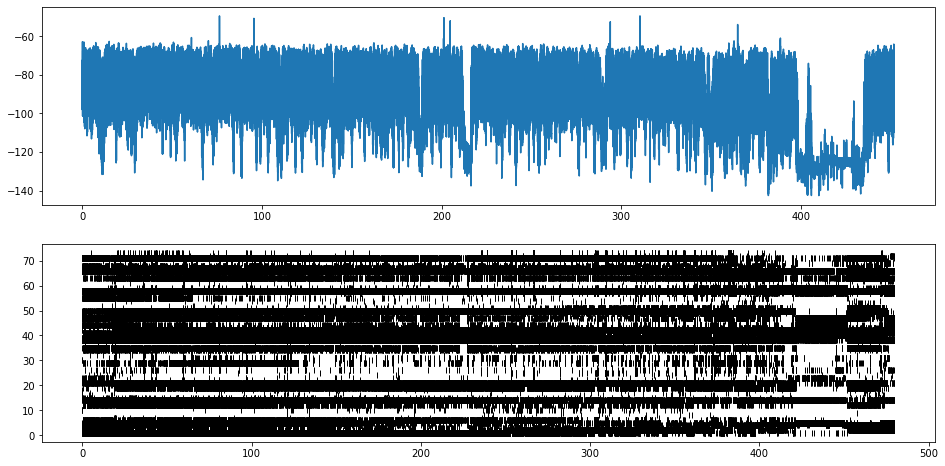

In [69]:
fig, axes = plt.subplots(len(spike_rasters) + 1, 1, figsize=(16, 8))

# plot whisker angle in the first subplot
axes[0].plot(tracking_timestamps, whisker_angles[0])

# plot spike raster in the remaining subplots, one per probe
for insertion_num, ax in zip(spike_rasters, axes[1:]):
    ax.plot(spike_rasters[insertion_num]['spike_vec'], spike_rasters[insertion_num]['unit_vec'], 'k|')

## Example segmentation by trial

In [41]:
experiment.BehaviorTrial * experiment.SessionTrial & session_key

subject_id,session session number,trial trial number (1-based indexing),task task type,task_protocol task protocol,start_time (s) relative to session beginning,stop_time (s) relative to session beginning
vIRt49,1,0,hf wheel,0,0.0000,372.6174
vIRt49,1,1,hf wheel,0,372.6174,431.5374
vIRt49,1,2,hf wheel,0,431.5374,479.5032


### fetch back the start and stop times of all trials in this session

In [70]:
trial_starts, trial_stops = (experiment.BehaviorTrial * experiment.SessionTrial & session_key).fetch('start_time', 'stop_time')

In [43]:
trial_starts

array([Decimal('0.0000'), Decimal('372.6174'), Decimal('431.5374')],
      dtype=object)

In [44]:
trial_stops

array([Decimal('372.6174'), Decimal('431.5374'), Decimal('479.5032')],
      dtype=object)

### extract the whisker angle data from the last trial only

In [71]:
in_trial = np.logical_and(tracking_timestamps >= trial_starts[-1], tracking_timestamps < trial_stops[-1])

In [72]:
trial_timestamps = tracking_timestamps[in_trial]
trial_whisker = whisker_angles[1][in_trial]

In [73]:
trial_timestamps

array([431.538, 431.54 , 431.542, ..., 462.918, 462.92 , 462.922])

In [74]:
trial_whisker

array([-65.57880402, -63.64982224, -63.00873947, ...,          nan,
                nan,          nan])

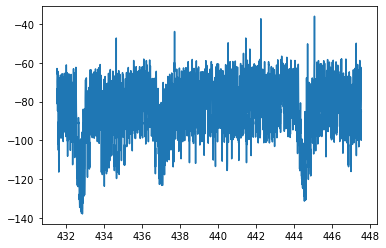

In [75]:
plt.plot(trial_timestamps, trial_whisker)

### extract the unit spiketimes from the last trial only

In [62]:
units, spikes, waveforms = (ephys.Unit * ephys.Unit.Waveform & insertion_key).fetch('unit', 'spike_times', 'waveform')

In [53]:
units

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73], dtype=int64)

In [79]:
unit_spikes = spikes[5]  # select spike times from unit #5

In [80]:
unit_spikes

array([2.55533333e-01, 2.82800000e-01, 3.16766667e-01, ...,
       4.36291633e+02, 4.37879000e+02, 4.53534667e+02])

In [81]:
in_trial = np.logical_and(unit_spikes >= trial_starts[-1], unit_spikes < trial_stops[-1])

In [82]:
trial_spikes = unit_spikes[in_trial]

In [83]:
trial_spikes

array([432.71416667, 432.8324    , 432.8684    , 432.89853333,
       432.92276667, 433.06416667, 436.29163333, 437.879     ,
       453.53466667])

### PLOT

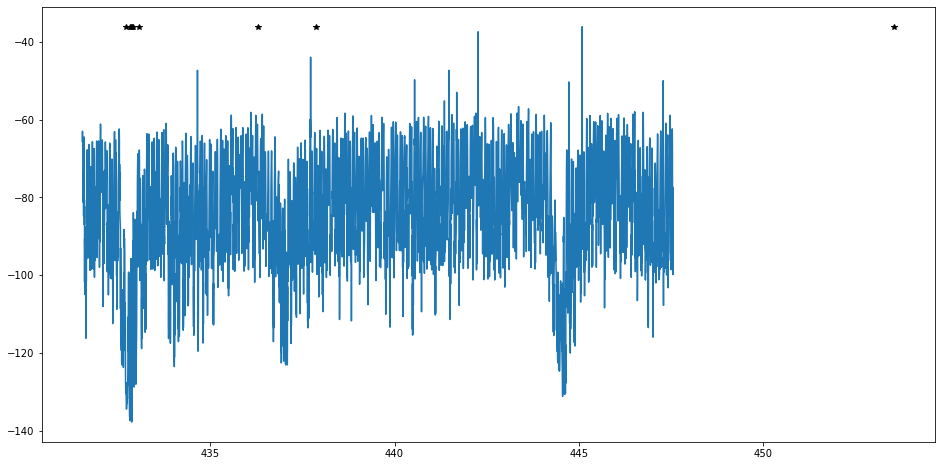

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(trial_timestamps, trial_whisker)
ax.plot(trial_spikes, np.full_like(trial_spikes, np.nanmax(trial_whisker)), 'k*')